# Fitness landscaper example notebook

This notebook shows how to use the `fitness-landscaper` library.

Imports

In [11]:
import numpy as np
import warnings

from fitland.domain_builder import DomainBuilder
from fitland.func_components import *

Since we get `NaN` Z values when defining infeasible regions, `matplotlib` throws `Warning`s about it, but we can just ignore them.

In [12]:
warnings.filterwarnings("ignore")

The library has some predefined components, but we can also use the `CustomFunc2D` component supplying it with a custom function we can define.

In [41]:
def my_func(x, y):
    return (np.cos(x) - np.sin(y))

We can then build the domain using the `DomainBuilder` and providing all components and desired properties.

In [42]:
domain = DomainBuilder().build_domain(name='My example domain',
                                      components=[
                                          Gaussian2D(means=(1, 2),
                                                     stds=(1, 1),
                                                     theta=0,
                                                     w=0.75),
                                          Gaussian2D(means=(-0.5, -1),
                                                     stds=(0.5, 2),
                                                     theta=0.75,
                                                     w=0.5),
                                          Plane2D(params=[0.1, 0.1, 0.05, 0],
                                                  w=0.5),
                                          CustomFunc2D(name='my-function',
                                                       f=my_func,
                                                       w=0.1),
                                          Perlin2D(w=0.1),
                                          Peak2D(center=(-4,4),
                                                 r=0.05,
                                                 w=1),
                                          # infeasible regions
                                          Poly2D(points=[(0.25, 0.25), (0, 3), (0.75, 0.5), (3, 0.75), (2.25, 0)],
                                                 w=np.nan),
                                          Circle2D(center=(-2, -2),
                                                   radius=1,
                                                   w=np.nan)
                                      ],
                                      xy_bounds=((-5, 5), (-5, 5)),
                                      z_bounds=(0, 1))

print(domain)

Properties of "My example domain":
Bounds are:
	X: [-5, 5]
	Y: [-5, 5]
	Z: [0, 1]
Z-values manipulations are:
	Offset (normalize): 0.0977	Scale (normalize): 1.3443
	Offset: 0	Scale: 1
This domain has 8 active components:
	Gaussian2D component: N(1, 1), N(2, 1), theta=0, weight=0.75
	Gaussian2D component: N(-0.5, 0.5), N(-1, 2), theta=0.75, weight=0.5
	Plane2D component: 0.1x + 0.1y + 0.05z + 0 = 0, weight=0.5
	my-function component: weight=0.1
	Perlin2D component: weight=0.1
	Peak2D component: center=(-4, 4), slope=0.05, weight=1
	Poly2D component: points: [[0.25, 0.25], [0.0, 3.0], [0.75, 0.5], [3.0, 0.75], [2.25, 0.0]], weight=nan
	Circle2D component: center=(-2, -2), radius=1, weight=nan


We can also visualize the domain within its bounds

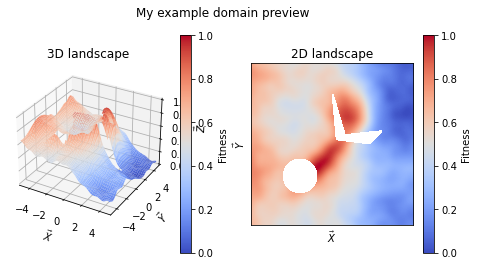

In [43]:
domain.show()

Otherwise, we can get a random domain. We need to only provide the desired amount of feasible and infeasible components.

In [20]:
domain = DomainBuilder().build_domain(name='my-random-domain',
                                      components=[4, 3],
                                      xy_bounds=((-5, 5), (-5, 5)),
                                      z_bounds=(0, 1))

print(domain)

Properties of "my-random-domain":
Bounds are:
	X: [-5, 5]
	Y: [-5, 5]
	Z: [0, 1]
Z-values manipulations are:
	Offset (normalize): -1.0928	Scale (normalize): 2.2081
	Offset: 0	Scale: 1
This domain has 7 active components:
	Perlin2D component: weight=0.8146210524014148
	Peak2D component: center=(-3.7094862153187047, 2.1764611457794727), slope=0.24349180926867753, weight=0.2474488664567056
	Gaussian2D component: N(0.5025745102819386, 1.628598121057195), N(1.9551434359345246, 1.110334354740703), theta=1.508023669067921, weight=0.8791050718986458
	Peak2D component: center=(-2.8803317817654097, 0.637198107457766), slope=0.6203633372196877, weight=0.07464459796987477
	Poly2D component: points: [[3.0188796200984283, 1.9843075345344208], [4.37566435075593, -0.11736584032167507], [6.10434932164201, -0.017651952632889323], [6.2857355053575485, 2.8094277524389595], [3.988498158159436, 3.2364110949753666]], weight=nan
	Circle2D component: center=(4.58226917729362, 0.8330912264148704), radius=1.4353

And again, we can visualize it.

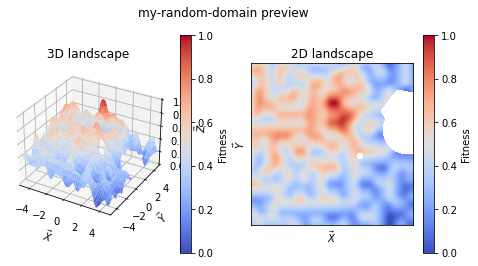

In [21]:
domain.show()